In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from paths import DATA_PATH

In [34]:
label_distr=dict(positive=15834,
    negative=8916,
    neutral=3687,
    unlabeled=2177)
label_df = pd.DataFrame(label_distr, index=[1])


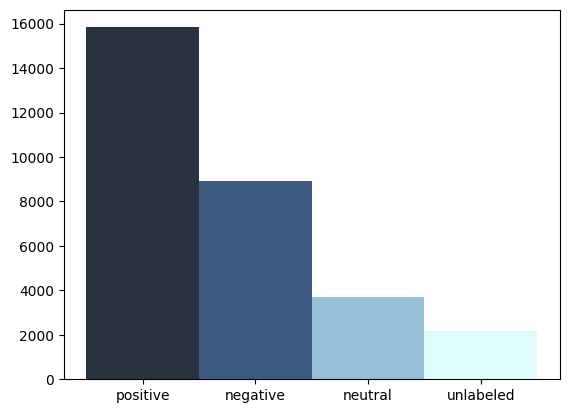

In [40]:
plt.bar(label_distr.keys(), label_distr.values(), 1, color=["#293241", '#3D5A80', '#98C1D9', '#E0FBFC'])
plt.show()

In [50]:
df = pd.read_csv(DATA_PATH / 'preview.csv')
df

,close,forecast
0,121.11,144.241854
1,121.11,144.241854
2,121.11,144.241854
3,121.11,141.622477
4,121.11,142.071631
...,...,...
30609,237.06,221.580993
30610,237.06,221.170438
30611,237.06,221.727463
30612,237.06,221.580993


In [69]:
n_samples = len(df)
n_samples

30614

In [70]:
frame_count = 30

In [71]:
batch_size = int(n_samples / frame_count)

/var/folders/4z/tbymbl2s59dcpbxbxz0j0ys40000gn/T/ipykernel_63186/1609941327.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, dpi=dpi)


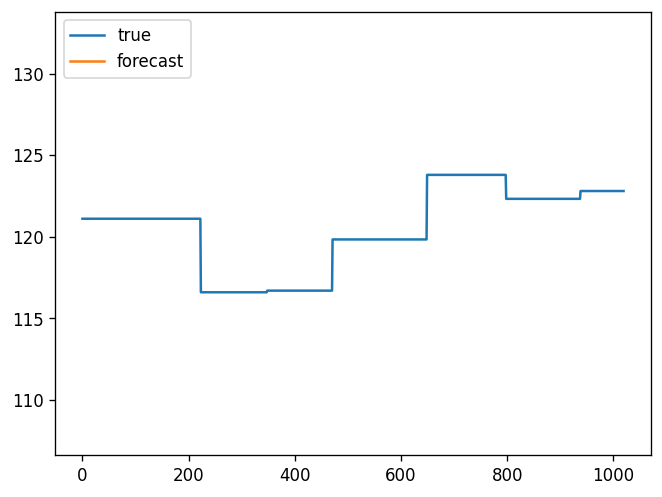

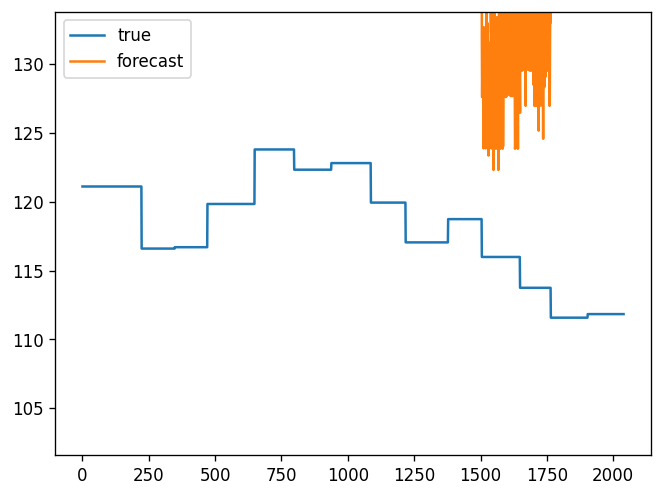

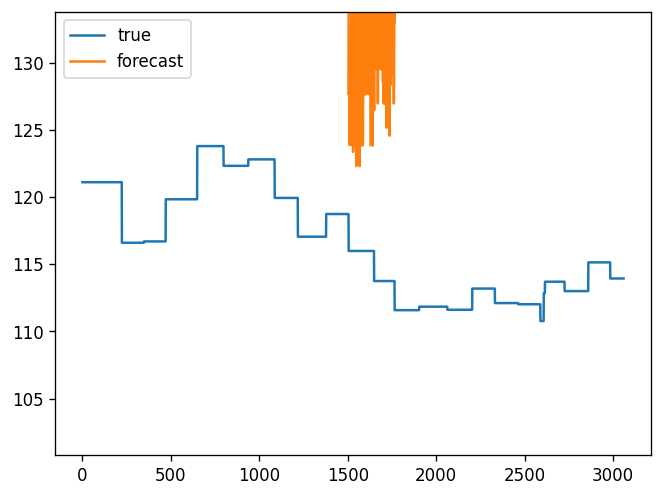

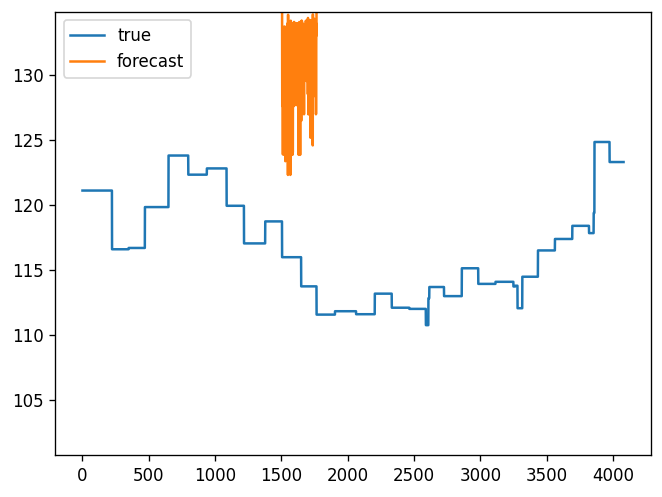

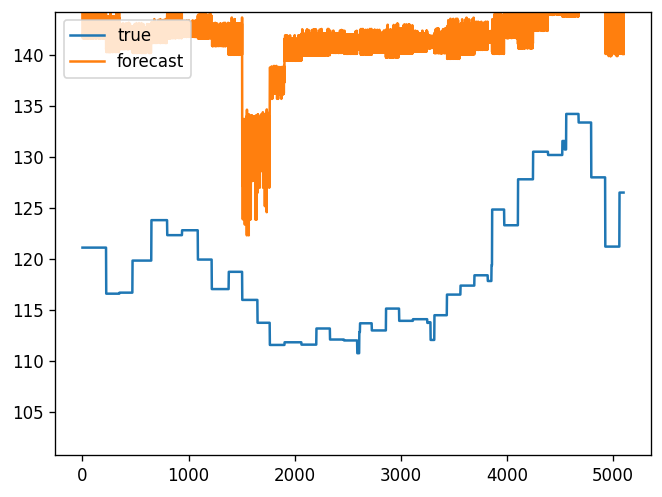

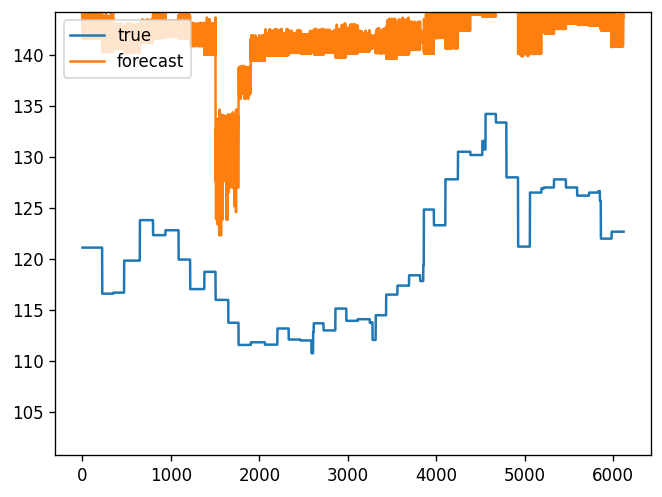

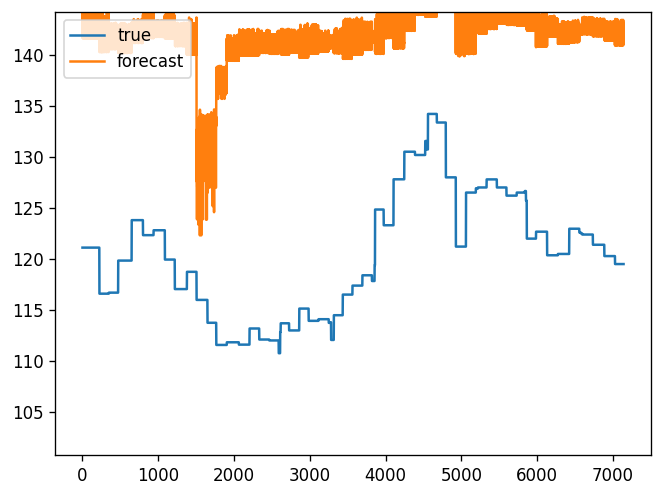

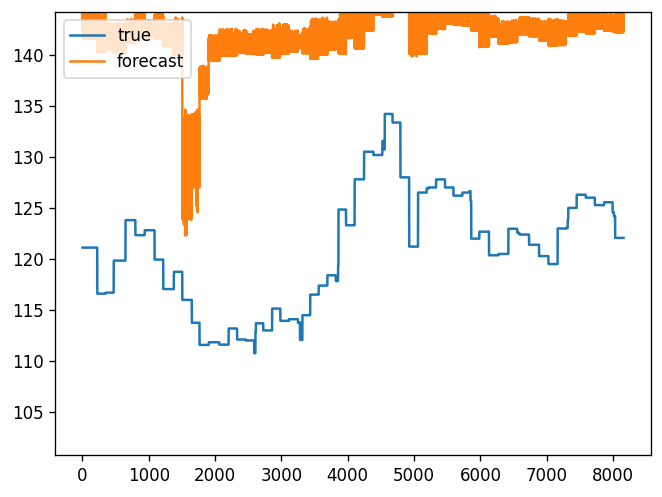

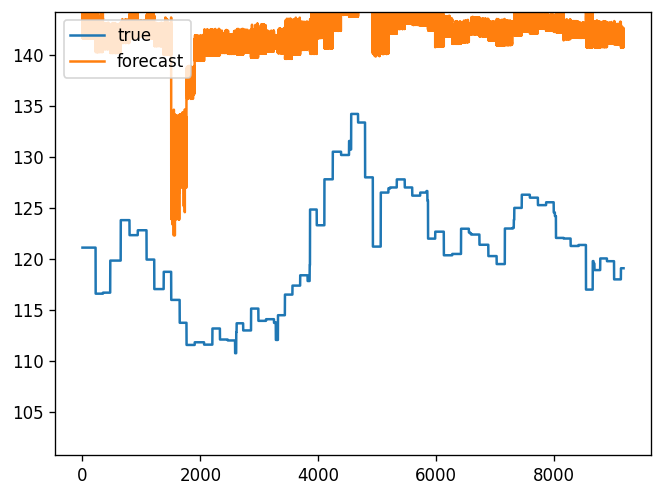

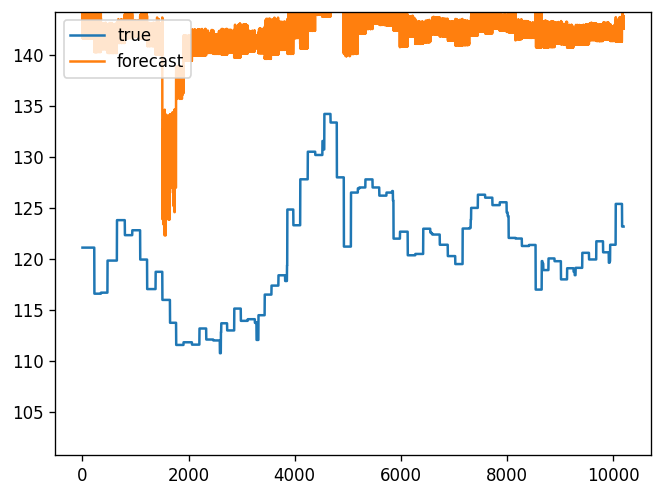

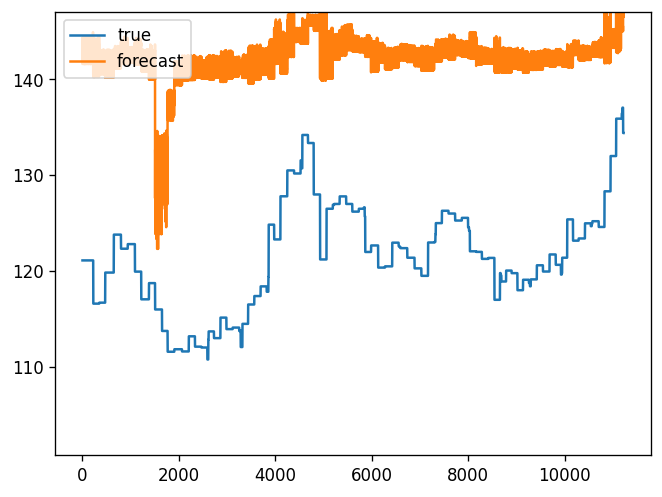

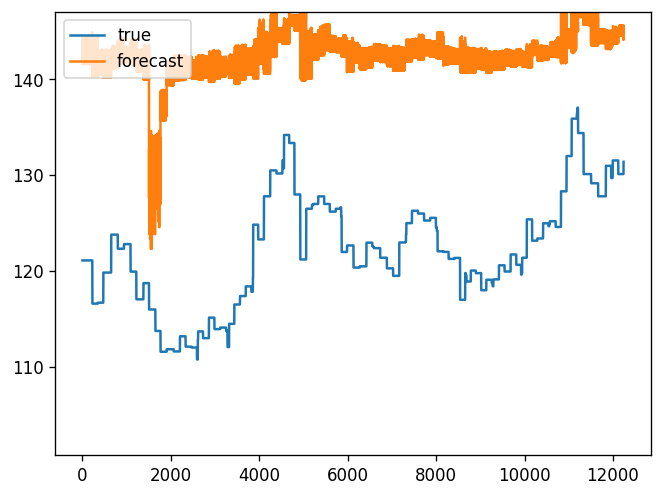

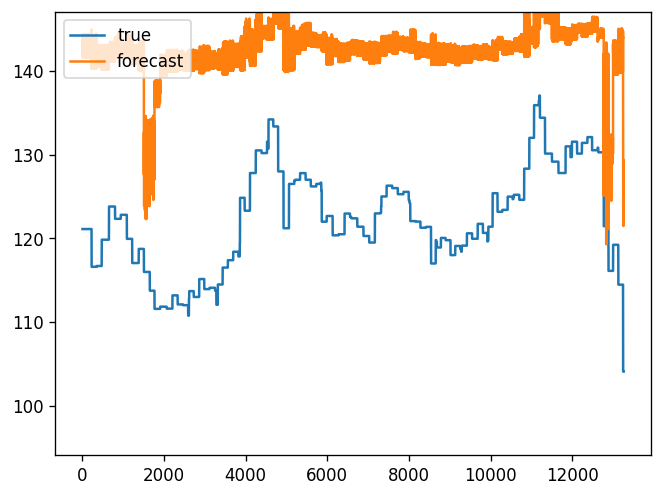

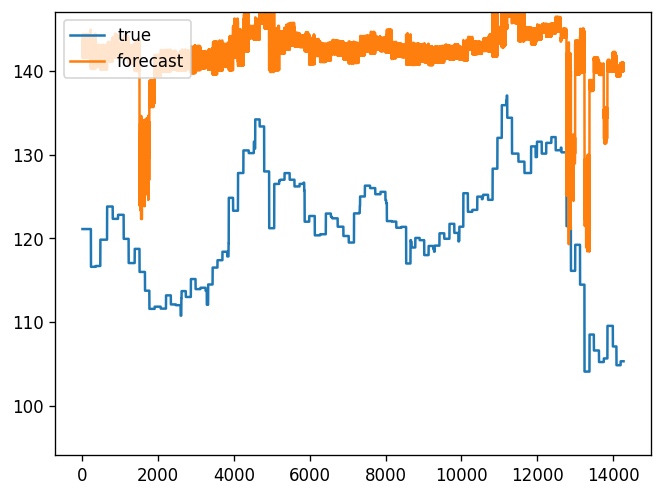

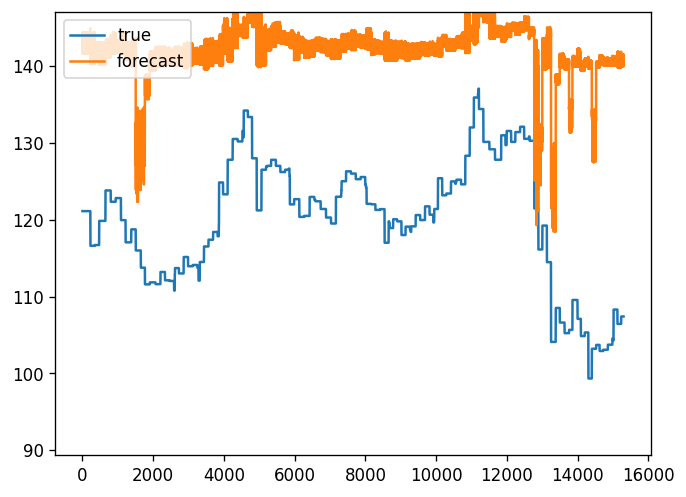

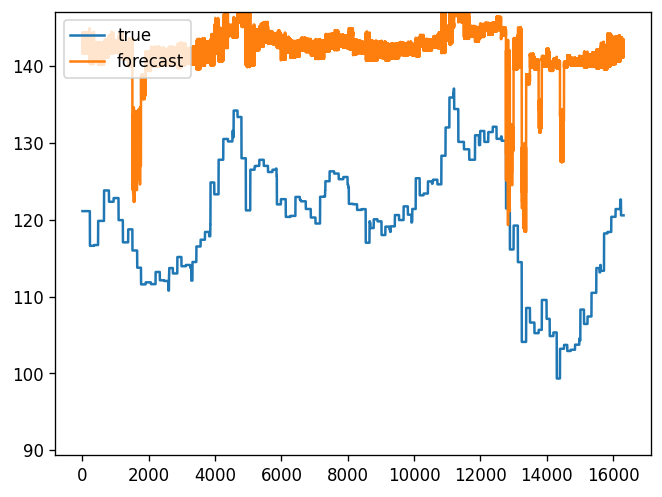

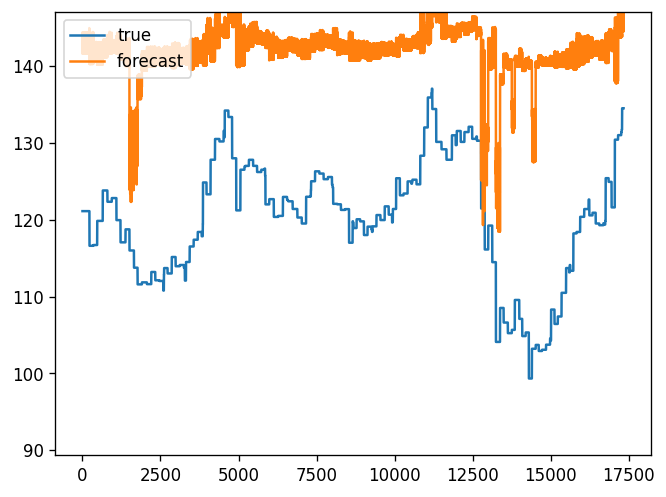

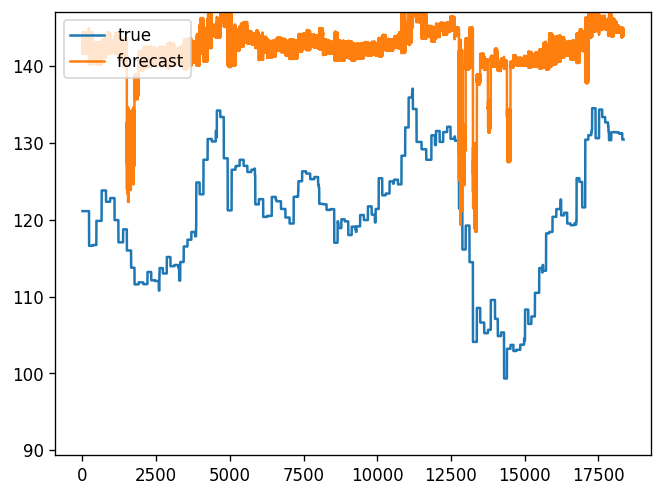

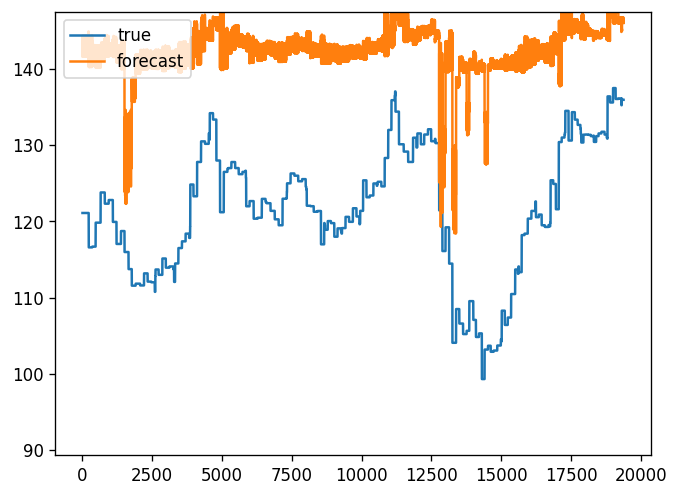

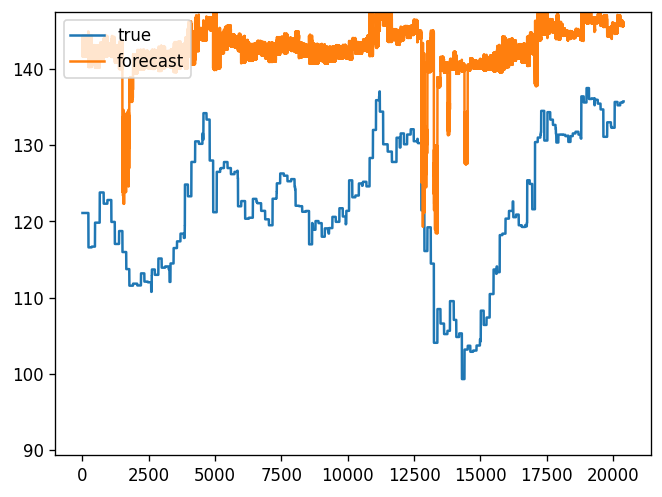

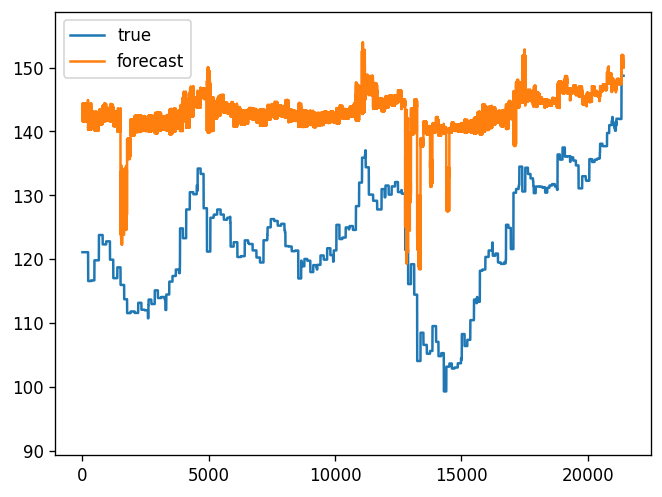

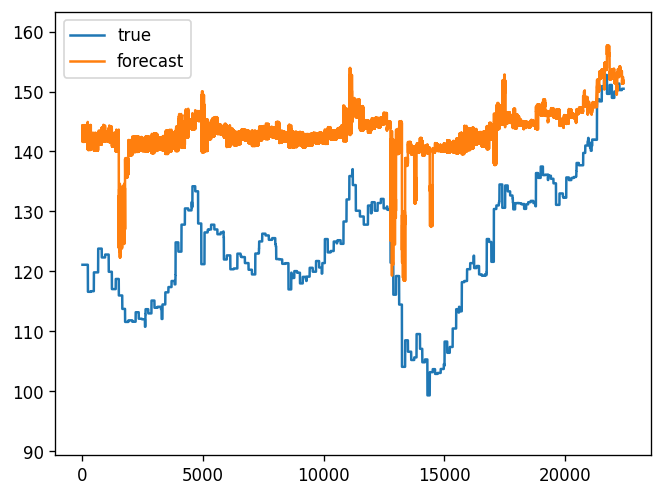

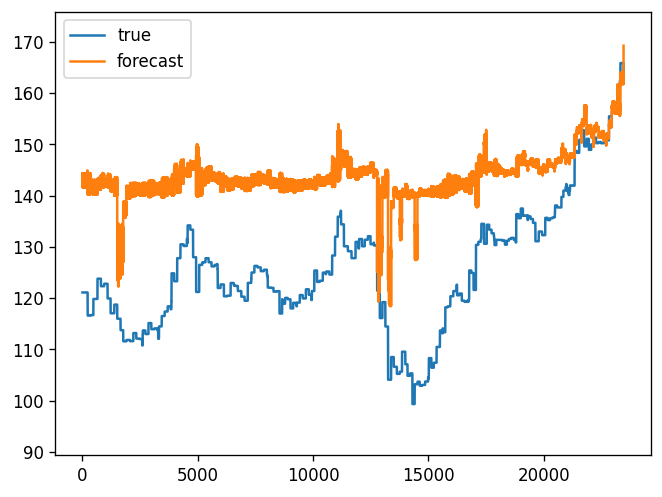

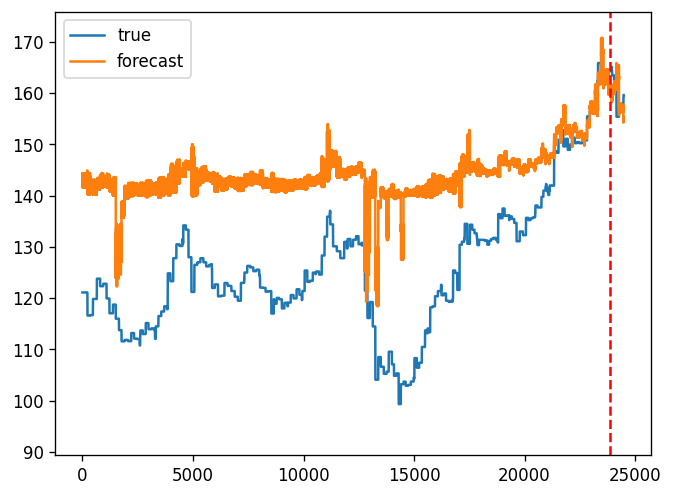

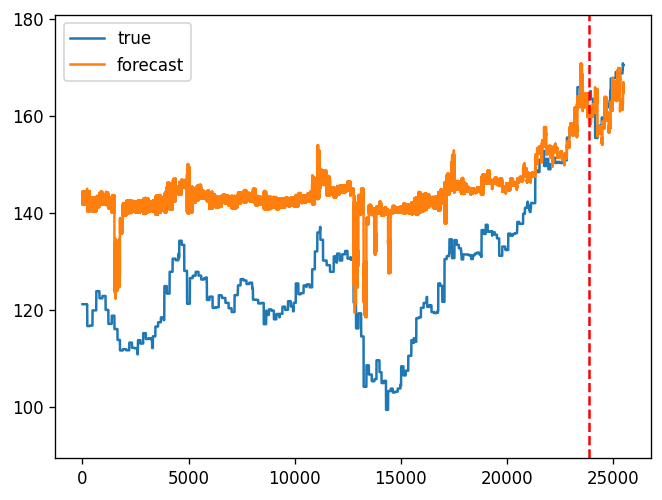

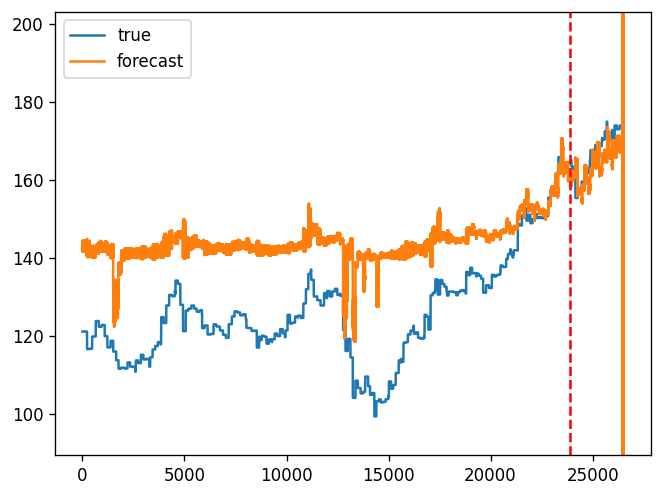

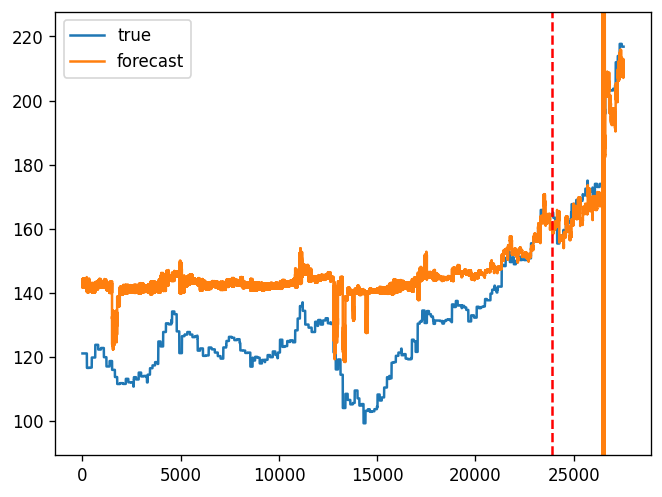

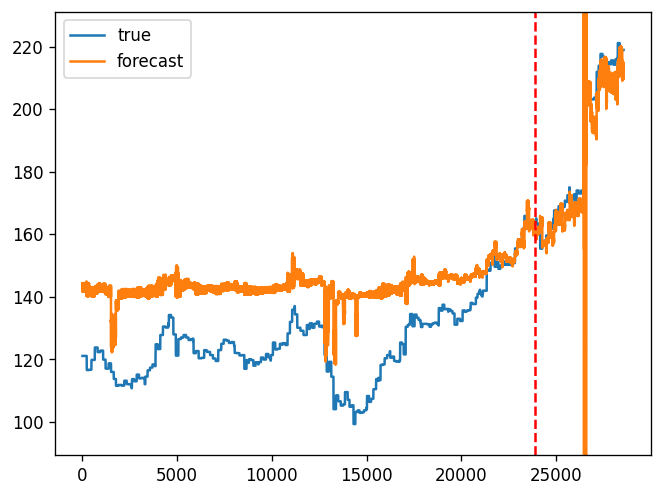

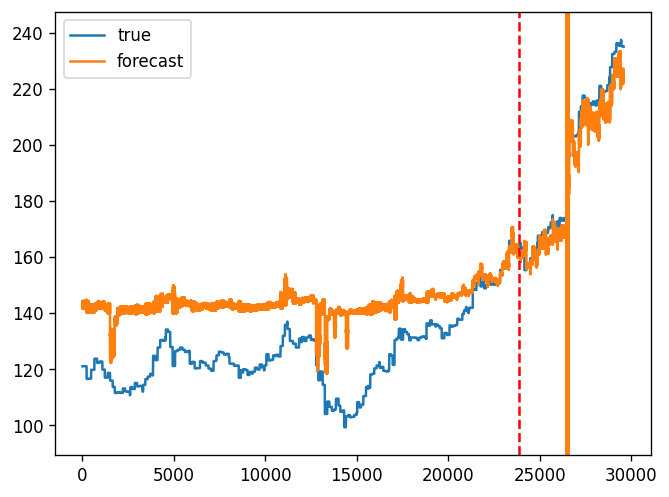

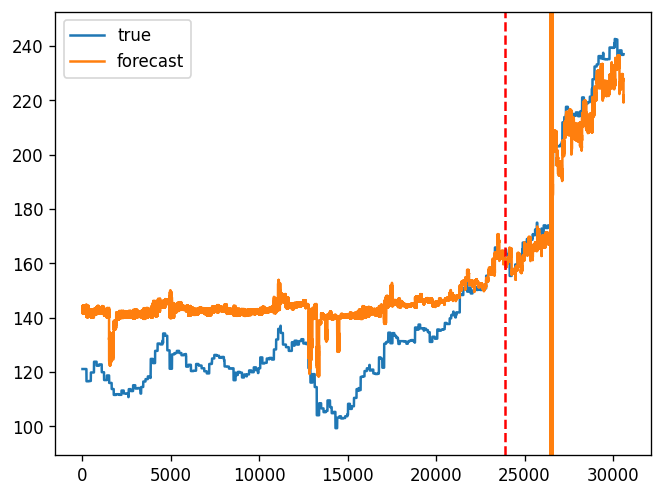

In [76]:
def plot_frame(until, dpi=120):
    fig, ax = plt.subplots(1,1, dpi=dpi)
    train_size = int(n_samples * (1-0.22))

    y = df['close'][:until]
    y_pred = df['forecast'][:until]

    ax.plot(y, label='true')
    ax.plot(y_pred, label='forecast')
    ax.set_ylim((y.min()-10, y.max()+10))
    if train_size < until:
        plt.axvline(x=train_size, c='r', linestyle='--')
    ax.legend(loc='upper left')
    plt.savefig(DATA_PATH / 'preview_frames' / f'{until}.png')


start = 0
for i in range(frame_count):
    start += batch_size
    plot_frame(start)

30614